In [1]:
import matplotlib.pyplot as plt
import pandas as pd

## Open results file and clean data

In [2]:
RESULT_FNAME = '../data/result.csv'

result_file = open(RESULT_FNAME, 'r')
data = result_file.read()
result_file.close()
data = data.split('\n')

In [3]:
field_names = data[0].split(',')
data = data[1:]

In [4]:
# Clean up data
def clean_field(field):
    start = field.find('\x00')
    if start >= 0:
        field = field[1:]
        field = clean_field(field)
    start = field.find(')')
    if start > 0:
        field = field[start+1:]
    return field

In [5]:
data = [line.split(',') for line in data]

clean_data = []
for fields in data:
    if len(fields) < 10:
        continue
    fields = [field.strip() for field in fields]
    fields = [clean_field(field) for field in fields]
    fields = [int(field) for field in fields]
    if fields[2] == 0:
        continue
    clean_data.append(fields)


In [6]:
data = clean_data

In [7]:
blocks = {}
ix = 0
clean_data = []
for fields in data:
    block = fields[0]
    if block in blocks.keys():
        continue
    else:
        blocks[block] = fields[1:]
        if len(fields) != 12:
            missing_fields = 12 - len(fields)
            for i in range(0, missing_fields):
                fields.append(0)
        if len(fields) != 12:
            print('ERR:', fields)
        clean_data.append(fields)
    ix += 1

## Show initial data

In [8]:
df = pd.DataFrame(clean_data, columns=field_names)

In [9]:
df

,Block,CodeSize,ProofSize,RLPSize,UnRLPSize,SnappySize,Indices,ZeroLevels,Hashes,Leaves,totalChunks,chunksGasCost
0,7011215,220324,139918,148250,225946,70031,6356,927,78400,54235,0,0
1,7011216,27237,17944,19039,29517,9764,812,141,9920,7071,0,0
2,7011217,258872,170432,180590,274115,88722,7632,1148,95712,65940,0,0
3,7011218,21980,13466,14263,21270,7939,572,91,7712,5091,0,0
4,7011219,103070,46687,49426,73796,25163,2044,288,26624,17731,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3160956,10278517,277454,91053,98301,172193,80336,9060,118,4960,76915,2195,768250
3160957,10278518,901179,219001,236265,409108,194269,21108,356,16576,180961,5057,1769950
3160958,10278519,1463031,354437,382386,663152,314250,34576,457,24480,294924,8332,2916200
3160959,10278520,455458,111220,119975,207487,97860,10752,158,8320,91990,2582,903700


## Calculate Proof size % compared vs code size

In [10]:
def print_stats(df, field):
    print(field)
    print('\tMean:', df[field].mean())
    print('\tMin:', df[field].min())
    print('\tMax:', df[field].max())

In [11]:
TOTAL_BLOCKS = len(df)

In [12]:
# Calculate proof sizes compared with total code size
df['RLPSize_perc'] = (df['RLPSize'] / df['CodeSize']) * 100
df['UnRLPSize_perc'] = (df['UnRLPSize'] / df['CodeSize']) * 100
df['SnappySize_perc'] = (df['SnappySize'] / df['CodeSize']) * 100

## Print stats for relevant fields

In [13]:
print_stats(df, 'RLPSize_perc')

RLPSize_perc
	Mean: 56.76026346270113
	Min: 4.496
	Max: 919.9999999999999


In [14]:
print_stats(df, 'UnRLPSize_perc')

UnRLPSize_perc
	Mean: 87.29297178636273
	Min: 5.834666666666666
	Max: 1891.111111111111


In [15]:
print_stats(df, 'SnappySize_perc')

SnappySize_perc
	Mean: 29.087916868190373
	Min: 3.024
	Max: 1060.0


In [16]:
print_stats(df, 'CodeSize')

CodeSize
	Mean: 431921.4596681199
	Min: 45
	Max: 1851641


In [17]:
print_stats(df, 'RLPSize')

RLPSize
	Mean: 239971.9178449212
	Min: 243
	Max: 990339


In [18]:
print_stats(df, 'UnRLPSize')

UnRLPSize
	Mean: 370044.9586499169
	Min: 620
	Max: 1498373


In [19]:
print_stats(df, 'SnappySize')

SnappySize
	Mean: 124139.98395298139
	Min: 458
	Max: 479987


## Show DataFrame sorted by RLPSize

In [20]:
df.sort_values(by=['RLPSize'])

,Block,CodeSize,ProofSize,RLPSize,UnRLPSize,SnappySize,Indices,ZeroLevels,Hashes,Leaves,totalChunks,chunksGasCost,RLPSize_perc,UnRLPSize_perc,SnappySize_perc
3117659,10233213,45,220,243,620,470,16,10,0,194,2,700,540.000000,1377.777778,1044.444444
3070540,10183834,545,344,369,620,458,16,6,128,194,2,700,67.706422,113.761468,84.036697
2860516,9963143,545,344,369,620,458,16,6,128,194,2,700,67.706422,113.761468,84.036697
2698554,9794503,545,344,369,620,458,16,6,128,194,1,0,67.706422,113.761468,84.036697
2892426,9996584,545,344,369,620,458,16,6,128,194,2,700,67.706422,113.761468,84.036697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2590094,9677520,1240589,912746,966276,1458514,433640,41444,5457,515872,349973,0,0,77.888487,117.566253,34.954364
2589750,9677167,1418070,917707,971765,1470461,441820,41620,5664,517696,352727,0,0,68.527294,103.694528,31.156431
2457207,9539684,1527087,928628,979684,1391872,479987,39640,3310,551456,334222,0,0,64.153778,91.145560,31.431543
2615650,9704019,1444445,932210,987235,1496080,452582,42264,5854,525184,358908,0,0,68.347012,103.574729,31.332588


## Show DataFrame sorted by RLPSize %

In [21]:
df.sort_values(by=['RLPSize_perc'])

,Block,CodeSize,ProofSize,RLPSize,UnRLPSize,SnappySize,Indices,ZeroLevels,Hashes,Leaves,totalChunks,chunksGasCost,RLPSize_perc,UnRLPSize_perc,SnappySize_perc
2140592,9209997,18750,800,843,1094,567,24,4,512,260,0,0,4.496000,5.834667,3.024000
2680557,9775854,24526,1096,1173,1812,1119,84,1,256,755,0,0,4.782680,7.388078,4.562505
2674632,9769739,24526,1096,1173,1812,1119,84,1,256,755,0,0,4.782680,7.388078,4.562505
2242807,9316095,22722,1072,1130,1508,726,36,5,672,359,0,0,4.973154,6.636740,3.195141
2428056,9509409,22722,1072,1130,1508,726,36,5,672,359,0,0,4.973154,6.636740,3.195141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1603784,8654146,45,382,414,851,477,16,12,160,194,0,0,920.000000,1891.111111,1060.000000
2453073,9535383,45,382,414,851,477,16,12,160,194,0,0,920.000000,1891.111111,1060.000000
377174,7393364,45,382,414,851,477,16,12,160,194,0,0,920.000000,1891.111111,1060.000000
108685,7121810,45,382,414,851,477,16,12,160,194,0,0,920.000000,1891.111111,1060.000000


## Get Rows where the RLPSize is > 100% of CodeSize

In [22]:
rlp_perc_gt_100 = df[df.RLPSize_perc > 100]
rlp_perc_gt_100

,Block,CodeSize,ProofSize,RLPSize,UnRLPSize,SnappySize,Indices,ZeroLevels,Hashes,Leaves,totalChunks,chunksGasCost,RLPSize_perc,UnRLPSize_perc,SnappySize_perc
14,7011231,874,1158,1232,1923,801,48,12,640,458,0,0,140.961098,220.022883,91.647597
112,7011333,4951,4949,5266,8314,3390,212,52,2688,1997,0,0,106.362351,167.925672,68.471016
176,7011399,3739,4492,4771,7549,2474,212,37,2432,1811,0,0,127.600963,201.898903,66.167424
845,7012081,37062,35238,37347,56999,18478,1592,242,19712,13692,0,0,100.768982,153.793643,49.856996
1349,7012594,17420,18004,19099,29452,9630,812,137,9984,7071,0,0,109.638347,169.070034,55.281286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2768405,9867019,565,719,778,1380,803,60,6,96,557,13,4550,137.699115,244.247788,142.123894
2792581,9892194,540,686,749,1567,1081,52,17,64,553,9,3150,138.703704,290.185185,200.185185
2854632,9957031,417,471,512,986,640,40,7,32,392,8,2800,122.781775,236.450839,153.477218
2878601,9982103,565,719,778,1380,803,60,6,96,557,13,4550,137.699115,244.247788,142.123894


In [23]:
# RLPSize greater than CodeSize
rlp_size_gt_cs = df[(df.RLPSize > df.CodeSize)]
rlp_size_gt_cs

,Block,CodeSize,ProofSize,RLPSize,UnRLPSize,SnappySize,Indices,ZeroLevels,Hashes,Leaves,totalChunks,chunksGasCost,RLPSize_perc,UnRLPSize_perc,SnappySize_perc
14,7011231,874,1158,1232,1923,801,48,12,640,458,0,0,140.961098,220.022883,91.647597
112,7011333,4951,4949,5266,8314,3390,212,52,2688,1997,0,0,106.362351,167.925672,68.471016
176,7011399,3739,4492,4771,7549,2474,212,37,2432,1811,0,0,127.600963,201.898903,66.167424
845,7012081,37062,35238,37347,56999,18478,1592,242,19712,13692,0,0,100.768982,153.793643,49.856996
1349,7012594,17420,18004,19099,29452,9630,812,137,9984,7071,0,0,109.638347,169.070034,55.281286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2768405,9867019,565,719,778,1380,803,60,6,96,557,13,4550,137.699115,244.247788,142.123894
2792581,9892194,540,686,749,1567,1081,52,17,64,553,9,3150,138.703704,290.185185,200.185185
2854632,9957031,417,471,512,986,640,40,7,32,392,8,2800,122.781775,236.450839,153.477218
2878601,9982103,565,719,778,1380,803,60,6,96,557,13,4550,137.699115,244.247788,142.123894


### Sorted by RLPSize %

In [24]:
rlp_size_gt_cs.sort_values(by=['RLPSize_perc'])

,Block,CodeSize,ProofSize,RLPSize,UnRLPSize,SnappySize,Indices,ZeroLevels,Hashes,Leaves,totalChunks,chunksGasCost,RLPSize_perc,UnRLPSize_perc,SnappySize_perc
385481,7401785,48060,45377,48062,72888,20780,2064,285,25504,17524,0,0,100.004161,151.660424,43.237620
2391712,9471689,236565,223556,236584,354425,108830,10040,1286,127168,85062,0,0,100.008032,149.821402,46.004269
678096,7698966,96965,91567,96973,146778,43352,4136,577,51616,35238,0,0,100.008250,151.372145,44.708916
2354192,9432675,193828,183161,193848,290700,85698,8228,1064,104128,69741,0,0,100.010318,149.978331,44.213426
2177628,9248457,71673,67759,71681,106849,32914,3032,373,38720,25634,0,0,100.011162,149.078454,45.922453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2465542,9548313,45,382,414,851,477,16,12,160,194,0,0,920.000000,1891.111111,1060.000000
2453073,9535383,45,382,414,851,477,16,12,160,194,0,0,920.000000,1891.111111,1060.000000
1603784,8654146,45,382,414,851,477,16,12,160,194,0,0,920.000000,1891.111111,1060.000000
1845653,8904950,45,382,414,851,477,16,12,160,194,0,0,920.000000,1891.111111,1060.000000


### Show average RLPSize % and CodeSize

In [25]:
print_stats(rlp_size_gt_cs, 'RLPSize')

RLPSize
	Mean: 56120.02457116365
	Min: 243
	Max: 567853


In [26]:
print_stats(rlp_size_gt_cs, 'RLPSize_perc')

RLPSize_perc
	Mean: 121.01495228859254
	Min: 100.00416146483562
	Max: 919.9999999999999


In [27]:
print_stats(rlp_size_gt_cs, 'CodeSize')

CodeSize
	Mean: 51827.38711172925
	Min: 45
	Max: 537186


In [28]:
total = len(rlp_size_gt_cs)

In [29]:
( total / TOTAL_BLOCKS ) * 100

0.2047162239584734

In [30]:
rlp_perc = rlp_size_gt_cs['RLPSize_perc'].tolist()

In [31]:
bt_100_149 = len([perc for perc in rlp_perc if perc >= 100 and perc < 150])
bt_100_149

5943

In [64]:
df_bt_100_149 = rlp_size_gt_cs[(rlp_size_gt_cs.RLPSize_perc >= 100)]
df_bt_100_149 = df_bt_100_149[(df_bt_100_149.RLPSize_perc < 150)]
df_bt_100_149.sort_values(by=['RLPSize_perc'])

,Block,CodeSize,ProofSize,RLPSize,UnRLPSize,SnappySize,Indices,ZeroLevels,Hashes,Leaves,totalChunks,chunksGasCost,RLPSize_perc,UnRLPSize_perc,SnappySize_perc
385481,7401785,48060,45377,48062,72888,20780,2064,285,25504,17524,0,0,100.004161,151.660424,43.237620
2391712,9471689,236565,223556,236584,354425,108830,10040,1286,127168,85062,0,0,100.008032,149.821402,46.004269
678096,7698966,96965,91567,96973,146778,43352,4136,577,51616,35238,0,0,100.008250,151.372145,44.708916
2354192,9432675,193828,183161,193848,290700,85698,8228,1064,104128,69741,0,0,100.010318,149.978331,44.213426
2177628,9248457,71673,67759,71681,106849,32914,3032,373,38720,25634,0,0,100.011162,149.078454,45.922453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2656822,9746612,242673,344404,363412,520689,177495,14904,1288,203456,124756,0,0,149.753784,214.564043,73.141635
732323,7754268,7008,9897,10501,16346,5102,464,73,5408,3952,0,0,149.843037,233.247717,72.802511
682492,7703423,7008,9897,10501,16346,5102,464,73,5408,3952,0,0,149.843037,233.247717,72.802511
725932,7747712,7008,9897,10501,16346,5102,464,73,5408,3952,0,0,149.843037,233.247717,72.802511


In [32]:
bt_150_199 = len([perc for perc in rlp_perc if perc >= 150 and perc < 200])
bt_150_199

339

In [65]:
df_bt_150_199 = rlp_size_gt_cs[(rlp_size_gt_cs.RLPSize_perc >= 150)]
df_bt_150_199 = df_bt_150_199[(df_bt_150_199.RLPSize_perc < 200)]
df_bt_150_199.sort_values(by=['RLPSize_perc'])

,Block,CodeSize,ProofSize,RLPSize,UnRLPSize,SnappySize,Indices,ZeroLevels,Hashes,Leaves,totalChunks,chunksGasCost,RLPSize_perc,UnRLPSize_perc,SnappySize_perc
2219554,9291908,45595,64554,68405,105280,32491,3004,429,35904,25217,0,0,150.027415,230.902511,71.260007
2459572,9542145,4468,6304,6704,10737,3879,288,62,3392,2562,0,0,150.044763,240.308863,86.817368
726313,7748098,6600,9341,9916,15501,5058,428,76,5120,3717,0,0,150.242424,234.863636,76.636364
52630,7064903,3108,4414,4672,6882,2462,184,28,2560,1642,0,0,150.321750,221.428571,79.214929
226439,7241059,7799,11073,11724,17572,5584,488,69,6304,4212,0,0,150.326965,225.310937,71.598923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1498210,8543426,910,1695,1802,2774,1238,64,19,960,652,0,0,198.021978,304.835165,136.043956
1353174,8392634,910,1695,1802,2774,1238,64,19,960,652,0,0,198.021978,304.835165,136.043956
1133140,8167074,910,1695,1802,2774,1238,64,19,960,652,0,0,198.021978,304.835165,136.043956
1676717,8729462,4794,8990,9536,14516,5298,384,72,5056,3478,0,0,198.915311,302.795161,110.513141


In [33]:
bt_200_499 = len([perc for perc in rlp_perc if perc >= 200 and perc < 500])
bt_200_499

182

In [66]:
df_bt_200_499 = rlp_size_gt_cs[(rlp_size_gt_cs.RLPSize_perc >= 200)]
df_bt_200_499 = df_bt_200_499[(df_bt_200_499.RLPSize_perc < 500)]
df_bt_200_499.sort_values(by=['RLPSize_perc'])

,Block,CodeSize,ProofSize,RLPSize,UnRLPSize,SnappySize,Indices,ZeroLevels,Hashes,Leaves,totalChunks,chunksGasCost,RLPSize_perc,UnRLPSize_perc,SnappySize_perc
2509124,9593553,30532,57757,61208,94641,28597,2716,386,32000,22655,0,0,200.471636,309.973143,93.662387
887370,7913804,488,924,986,1613,687,40,12,480,392,0,0,202.049180,330.532787,140.778689
1644977,8696709,6837,13140,13901,20608,6028,576,74,7552,4938,0,0,203.320170,301.418751,88.167325
164831,7178674,588,1127,1201,1923,809,48,13,608,458,0,0,204.251701,327.040816,137.585034
536519,7555140,2497,4863,5176,8291,3142,220,50,2592,2001,0,0,207.288746,332.038446,125.830997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2341408,9419259,120,413,445,851,477,16,11,192,194,0,0,370.833333,709.166667,397.500000
2341409,9419260,120,413,445,851,477,16,11,192,194,0,0,370.833333,709.166667,397.500000
2341412,9419263,120,413,445,851,477,16,11,192,194,0,0,370.833333,709.166667,397.500000
2497094,9581033,214,754,807,1370,665,32,12,384,326,0,0,377.102804,640.186916,310.747664


In [34]:
bt_500_999 = len([perc for perc in rlp_perc if perc >= 500])
bt_500_999

7

In [82]:
df_bt_500_999 = rlp_size_gt_cs[(rlp_size_gt_cs.RLPSize_perc >= 500)]
df_bt_500_999.sort_values(by=['RLPSize_perc'])

,Block,CodeSize,ProofSize,RLPSize,UnRLPSize,SnappySize,Indices,ZeroLevels,Hashes,Leaves,totalChunks,chunksGasCost,RLPSize_perc,UnRLPSize_perc,SnappySize_perc
3117659,10233213,45,220,243,620,470,16,10,0,194,2,700,540.0,1377.777778,1044.444444
108685,7121810,45,382,414,851,477,16,12,160,194,0,0,920.0,1891.111111,1060.000000
377174,7393364,45,382,414,851,477,16,12,160,194,0,0,920.0,1891.111111,1060.000000
1603784,8654146,45,382,414,851,477,16,12,160,194,0,0,920.0,1891.111111,1060.000000
1845653,8904950,45,382,414,851,477,16,12,160,194,0,0,920.0,1891.111111,1060.000000
2453073,9535383,45,382,414,851,477,16,12,160,194,0,0,920.0,1891.111111,1060.000000
2465542,9548313,45,382,414,851,477,16,12,160,194,0,0,920.0,1891.111111,1060.000000


In [80]:
df = df_bt_500_999[['Block', 'CodeSize', 'RLPSize', 'RLPSize_perc']]
df

,Block,CodeSize,RLPSize,RLPSize_perc
108685,7121810,45,414,920.0
377174,7393364,45,414,920.0
1603784,8654146,45,414,920.0
1845653,8904950,45,414,920.0
2453073,9535383,45,414,920.0
2465542,9548313,45,414,920.0
3117659,10233213,45,243,540.0


In [81]:
print(df.to_markdown())

|         |       Block |   CodeSize |   RLPSize |   RLPSize_perc |
|--------:|------------:|-----------:|----------:|---------------:|
|  108685 | 7.12181e+06 |         45 |       414 |            920 |
|  377174 | 7.39336e+06 |         45 |       414 |            920 |
| 1603784 | 8.65415e+06 |         45 |       414 |            920 |
| 1845653 | 8.90495e+06 |         45 |       414 |            920 |
| 2453073 | 9.53538e+06 |         45 |       414 |            920 |
| 2465542 | 9.54831e+06 |         45 |       414 |            920 |
| 3117659 | 1.02332e+07 |         45 |       243 |            540 |


In [35]:
perc_100_149 = (bt_100_149 / total) * 100
perc_100_149

91.84051923968475

In [36]:
perc_150_199 = (bt_150_199 / total) * 100
perc_150_199

5.238757533611498

In [37]:
perc_200_499 = (bt_200_499 / total) * 100
perc_200_499

2.812548292381394

In [38]:
perc_500_999 = (bt_500_999 / total) * 100
perc_500_999

0.1081749343223613

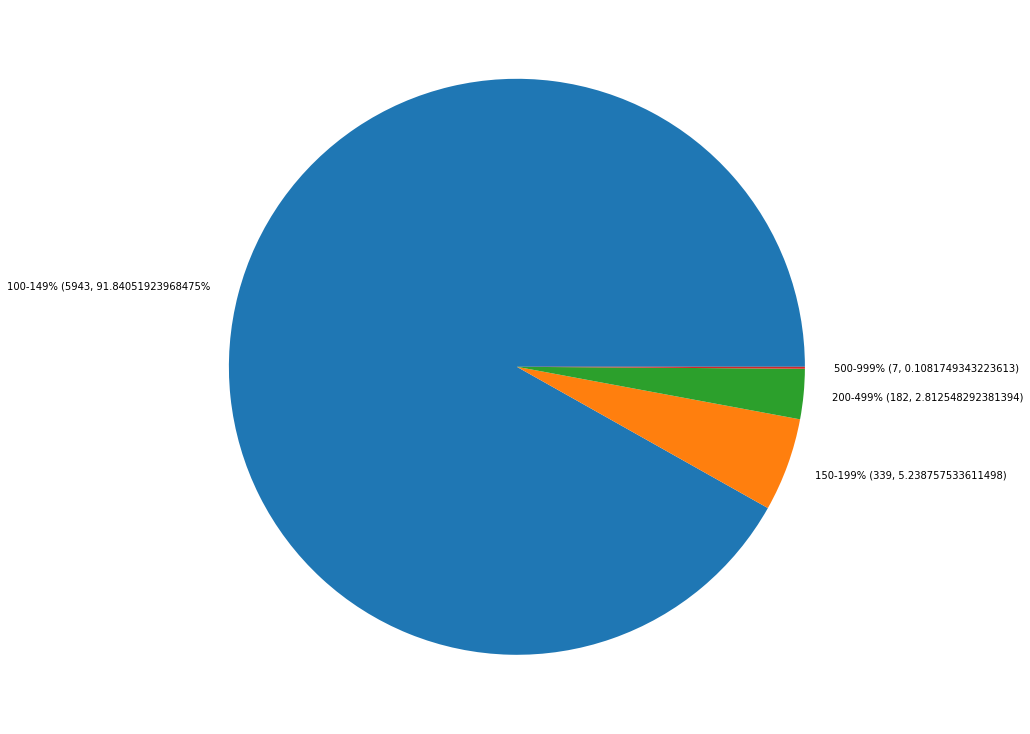

In [39]:
plt.rcParams["figure.figsize"] = (10, 10)
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('equal')

percentages = [
    '100-149% (' + str(bt_100_149) + ', ' + str(perc_100_149) + '%',
    '150-199% (' + str(bt_150_199) + ', ' + str(perc_150_199) + ')',
    '200-499% (' + str(bt_200_499) + ', ' + str(perc_200_499) + ')',
    '500-999% (' + str(bt_500_999) + ', ' + str(perc_500_999) + ')'
]

groups = [bt_100_149, bt_150_199, bt_200_499, bt_500_999]
ax.pie(groups, labels=percentages)
plt.show()

## Snappy

In [40]:
df.sort_values(by=['SnappySize_perc'])

,Block,CodeSize,ProofSize,RLPSize,UnRLPSize,SnappySize,Indices,ZeroLevels,Hashes,Leaves,totalChunks,chunksGasCost,RLPSize_perc,UnRLPSize_perc,SnappySize_perc
2140592,9209997,18750,800,843,1094,567,24,4,512,260,0,0,4.496000,5.834667,3.024000
2242807,9316095,22722,1072,1130,1508,726,36,5,672,359,0,0,4.973154,6.636740,3.195141
2428056,9509409,22722,1072,1130,1508,726,36,5,672,359,0,0,4.973154,6.636740,3.195141
21981,7033651,23263,1445,1524,2061,953,52,6,896,491,0,0,6.551176,8.859562,4.096634
1718637,8772795,10537,630,663,851,472,16,4,416,194,0,0,6.292114,8.076303,4.479453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2453073,9535383,45,382,414,851,477,16,12,160,194,0,0,920.000000,1891.111111,1060.000000
377174,7393364,45,382,414,851,477,16,12,160,194,0,0,920.000000,1891.111111,1060.000000
2465542,9548313,45,382,414,851,477,16,12,160,194,0,0,920.000000,1891.111111,1060.000000
1845653,8904950,45,382,414,851,477,16,12,160,194,0,0,920.000000,1891.111111,1060.000000


In [41]:
# Snappy greater than CodeSize
snappy_gt_cs = df[(df.SnappySize > df.CodeSize)]
snappy_gt_cs

,Block,CodeSize,ProofSize,RLPSize,UnRLPSize,SnappySize,Indices,ZeroLevels,Hashes,Leaves,totalChunks,chunksGasCost,RLPSize_perc,UnRLPSize_perc,SnappySize_perc
3556,7014849,6705,10833,11502,17704,6758,460,96,6048,4229,0,0,171.543624,264.041760,100.790455
3656,7014950,723,1842,1963,3155,1385,76,23,992,751,0,0,271.507607,436.376210,191.562932
8242,7019626,723,1842,1963,3155,1385,76,23,992,751,0,0,271.507607,436.376210,191.562932
10048,7021474,365,1189,1263,1923,762,48,11,672,458,0,0,346.027397,526.849315,208.767123
11088,7022547,558,1510,1618,2807,1335,64,26,768,652,0,0,289.964158,503.046595,239.247312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2768405,9867019,565,719,778,1380,803,60,6,96,557,13,4550,137.699115,244.247788,142.123894
2792581,9892194,540,686,749,1567,1081,52,17,64,553,9,3150,138.703704,290.185185,200.185185
2854632,9957031,417,471,512,986,640,40,7,32,392,8,2800,122.781775,236.450839,153.477218
2878601,9982103,565,719,778,1380,803,60,6,96,557,13,4550,137.699115,244.247788,142.123894


In [42]:
snappy_gt_cs.sort_values(by=['SnappySize_perc'])

,Block,CodeSize,ProofSize,RLPSize,UnRLPSize,SnappySize,Indices,ZeroLevels,Hashes,Leaves,totalChunks,chunksGasCost,RLPSize_perc,UnRLPSize_perc,SnappySize_perc
555519,7574448,1549,2471,2619,3846,1558,96,19,1440,916,0,0,169.076824,248.289219,100.581020
3556,7014849,6705,10833,11502,17704,6758,460,96,6048,4229,0,0,171.543624,264.041760,100.790455
2155482,9225495,8646,13724,14587,22896,8739,596,133,7520,5475,0,0,168.713856,264.816100,101.075642
1827852,8886365,631,816,869,1370,638,32,10,448,326,0,0,137.717908,217.115689,101.109350
1744328,8799574,960,1399,1488,2337,971,60,14,768,557,0,0,155.000000,243.437500,101.145833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2465542,9548313,45,382,414,851,477,16,12,160,194,0,0,920.000000,1891.111111,1060.000000
377174,7393364,45,382,414,851,477,16,12,160,194,0,0,920.000000,1891.111111,1060.000000
108685,7121810,45,382,414,851,477,16,12,160,194,0,0,920.000000,1891.111111,1060.000000
1845653,8904950,45,382,414,851,477,16,12,160,194,0,0,920.000000,1891.111111,1060.000000


In [43]:
snappy_gt_cs.sort_values(by=['CodeSize'])

,Block,CodeSize,ProofSize,RLPSize,UnRLPSize,SnappySize,Indices,ZeroLevels,Hashes,Leaves,totalChunks,chunksGasCost,RLPSize_perc,UnRLPSize_perc,SnappySize_perc
3117659,10233213,45,220,243,620,470,16,10,0,194,2,700,540.000000,1377.777778,1044.444444
377174,7393364,45,382,414,851,477,16,12,160,194,0,0,920.000000,1891.111111,1060.000000
2465542,9548313,45,382,414,851,477,16,12,160,194,0,0,920.000000,1891.111111,1060.000000
2453073,9535383,45,382,414,851,477,16,12,160,194,0,0,920.000000,1891.111111,1060.000000
1603784,8654146,45,382,414,851,477,16,12,160,194,0,0,920.000000,1891.111111,1060.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2458736,9541264,7025,13986,14839,22984,7443,640,106,7712,5528,0,0,211.231317,327.174377,105.950178
2155482,9225495,8646,13724,14587,22896,8739,596,133,7520,5475,0,0,168.713856,264.816100,101.075642
2528071,9613195,16226,37761,39759,54809,16939,1576,83,22976,13126,0,0,245.032664,337.785036,104.394182
1012421,8042461,20333,51561,54580,83108,26366,2404,302,28960,19895,0,0,268.430630,408.734569,129.670978


In [44]:
print_stats(snappy_gt_cs, 'SnappySize_perc')

SnappySize_perc
	Mean: 184.07985189270678
	Min: 100.58102001291157
	Max: 1060.0


In [45]:
print_stats(snappy_gt_cs, 'SnappySize')

SnappySize
	Mean: 1720.048275862069
	Min: 470
	Max: 28588


In [46]:
print_stats(snappy_gt_cs, 'CodeSize')

CodeSize
	Mean: 1283.5206896551724
	Min: 45
	Max: 24520


In [47]:
total = len(snappy_gt_cs)
total

290

In [48]:
( total / TOTAL_BLOCKS ) * 100

0.009174425119449433

In [49]:
snappy_perc = snappy_gt_cs['SnappySize_perc'].tolist()

In [50]:
bt_100_199 = len([perc for perc in snappy_perc if perc >= 100 and perc < 200])
bt_100_199

222

In [51]:
df_bt_100_199 = snappy_gt_cs[(snappy_gt_cs.SnappySize_perc >= 100)]
df_bt_100_199 = df_bt_100_199[(df_bt_100_199.SnappySize_perc < 200)]
df_bt_100_199.sort_values(by=['SnappySize_perc'])

,Block,CodeSize,ProofSize,RLPSize,UnRLPSize,SnappySize,Indices,ZeroLevels,Hashes,Leaves,totalChunks,chunksGasCost,RLPSize_perc,UnRLPSize_perc,SnappySize_perc
555519,7574448,1549,2471,2619,3846,1558,96,19,1440,916,0,0,169.076824,248.289219,100.581020
3556,7014849,6705,10833,11502,17704,6758,460,96,6048,4229,0,0,171.543624,264.041760,100.790455
2155482,9225495,8646,13724,14587,22896,8739,596,133,7520,5475,0,0,168.713856,264.816100,101.075642
1827852,8886365,631,816,869,1370,638,32,10,448,326,0,0,137.717908,217.115689,101.109350
1744328,8799574,960,1399,1488,2337,971,60,14,768,557,0,0,155.000000,243.437500,101.145833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2496250,9580150,723,1842,1963,3155,1385,76,23,992,751,0,0,271.507607,436.376210,191.562932
2496746,9580667,723,1842,1963,3155,1385,76,23,992,751,0,0,271.507607,436.376210,191.562932
721950,7743627,723,1842,1963,3155,1385,76,23,992,751,0,0,271.507607,436.376210,191.562932
2459613,9542187,723,1842,1963,3155,1385,76,23,992,751,0,0,271.507607,436.376210,191.562932


In [52]:
bt_200_499 = len([perc for perc in snappy_perc if perc >= 200 and perc < 500])
bt_200_499

61

In [53]:
df_bt_200_499 = snappy_gt_cs[(snappy_gt_cs.SnappySize_perc >= 200)]
df_bt_200_499 = df_bt_200_499[(df_bt_200_499.SnappySize_perc < 500)]
df_bt_200_499.sort_values(by=['SnappySize_perc'])

,Block,CodeSize,ProofSize,RLPSize,UnRLPSize,SnappySize,Indices,ZeroLevels,Hashes,Leaves,totalChunks,chunksGasCost,RLPSize_perc,UnRLPSize_perc,SnappySize_perc
2792581,9892194,540,686,749,1567,1081,52,17,64,553,9,3150,138.703704,290.185185,200.185185
263480,7278400,365,1189,1263,1923,762,48,11,672,458,0,0,346.027397,526.849315,208.767123
327447,7342970,365,1189,1263,1923,762,48,11,672,458,0,0,346.027397,526.849315,208.767123
2503706,9587926,365,1189,1263,1923,762,48,11,672,458,0,0,346.027397,526.849315,208.767123
625191,7645231,365,1189,1263,1923,762,48,11,672,458,0,0,346.027397,526.849315,208.767123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159537,7173290,136,514,552,989,520,20,11,256,227,0,0,405.882353,727.205882,382.352941
2341408,9419259,120,413,445,851,477,16,11,192,194,0,0,370.833333,709.166667,397.500000
2341409,9419260,120,413,445,851,477,16,11,192,194,0,0,370.833333,709.166667,397.500000
2341410,9419261,120,413,445,851,477,16,11,192,194,0,0,370.833333,709.166667,397.500000


In [88]:
pd.options.display.max_rows = None
df_bt_200_1100 = snappy_gt_cs[(snappy_gt_cs.SnappySize_perc >= 200)]
df_bt_200_1100 = df_bt_200_1100[['Block', 'CodeSize', 'SnappySize', 'SnappySize_perc']]
md = df_bt_200_1100.sort_values(by=['SnappySize_perc'])
md

,Block,CodeSize,SnappySize,SnappySize_perc
2792581,9892194,540,1081,200.185185
10048,7021474,365,762,208.767123
760096,7783000,365,762,208.767123
327447,7342970,365,762,208.767123
848097,7873420,365,762,208.767123
263480,7278400,365,762,208.767123
237622,7252329,365,762,208.767123
981146,8010164,365,762,208.767123
1324922,8363515,365,762,208.767123
158431,7172170,365,762,208.767123


In [87]:
print(md.to_markdown())

|         |       Block |   CodeSize |   SnappySize |   SnappySize_perc |
|--------:|------------:|-----------:|-------------:|------------------:|
| 2792581 | 9.89219e+06 |        540 |         1081 |           200.185 |
|   10048 | 7.02147e+06 |        365 |          762 |           208.767 |
|  760096 | 7.783e+06   |        365 |          762 |           208.767 |
|  327447 | 7.34297e+06 |        365 |          762 |           208.767 |
|  848097 | 7.87342e+06 |        365 |          762 |           208.767 |
|  263480 | 7.2784e+06  |        365 |          762 |           208.767 |
|  237622 | 7.25233e+06 |        365 |          762 |           208.767 |
|  981146 | 8.01016e+06 |        365 |          762 |           208.767 |
| 1324922 | 8.36352e+06 |        365 |          762 |           208.767 |
|  158431 | 7.17217e+06 |        365 |          762 |           208.767 |
|  155992 | 7.16968e+06 |        365 |          762 |           208.767 |
| 1803064 | 8.86068e+06 |        365 |

In [54]:
bt_500_1100 = len([perc for perc in snappy_perc if perc >= 500])
bt_500_1100

7

In [55]:
df_bt_500_1100 = snappy_gt_cs[(snappy_gt_cs.SnappySize_perc >= 500)]
df_bt_500_1100.sort_values(by=['SnappySize_perc'])

,Block,CodeSize,ProofSize,RLPSize,UnRLPSize,SnappySize,Indices,ZeroLevels,Hashes,Leaves,totalChunks,chunksGasCost,RLPSize_perc,UnRLPSize_perc,SnappySize_perc
3117659,10233213,45,220,243,620,470,16,10,0,194,2,700,540.0,1377.777778,1044.444444
108685,7121810,45,382,414,851,477,16,12,160,194,0,0,920.0,1891.111111,1060.000000
377174,7393364,45,382,414,851,477,16,12,160,194,0,0,920.0,1891.111111,1060.000000
1603784,8654146,45,382,414,851,477,16,12,160,194,0,0,920.0,1891.111111,1060.000000
1845653,8904950,45,382,414,851,477,16,12,160,194,0,0,920.0,1891.111111,1060.000000
2453073,9535383,45,382,414,851,477,16,12,160,194,0,0,920.0,1891.111111,1060.000000
2465542,9548313,45,382,414,851,477,16,12,160,194,0,0,920.0,1891.111111,1060.000000


In [56]:
perc_bt_100_199 = (bt_100_199 / total) * 100
perc_bt_100_199

76.55172413793103

In [57]:
perc_bt_200_499 = (bt_200_499 / total) * 100
perc_bt_200_499

21.03448275862069

In [58]:
perc_bt_500_1100 = (bt_500_1100 / total) * 100
perc_bt_500_1100

2.413793103448276

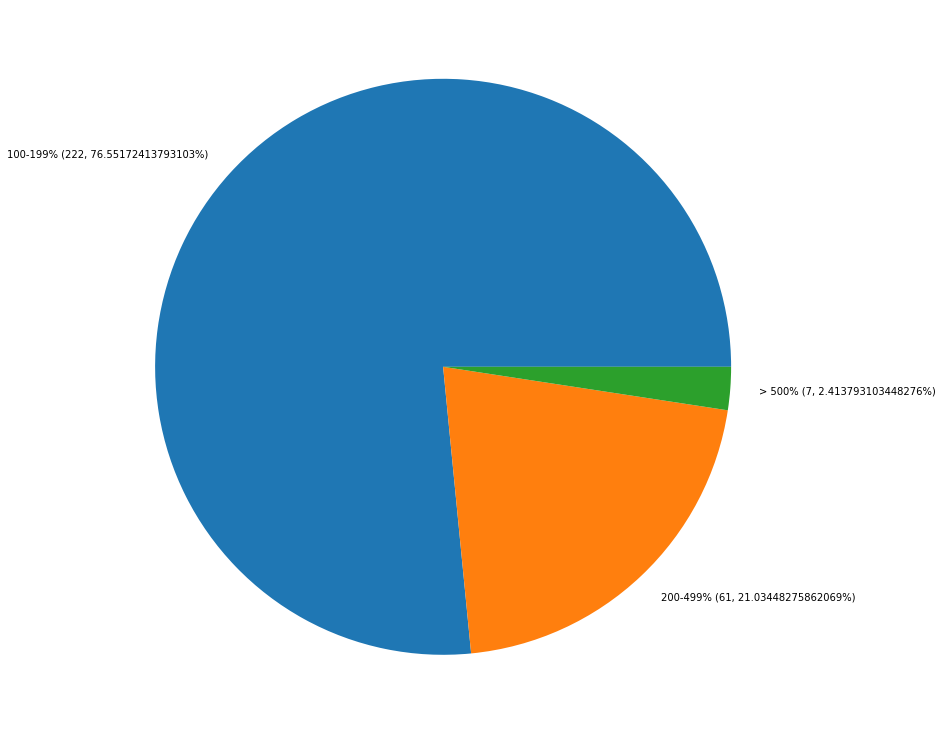

In [59]:
plt.rcParams["figure.figsize"] = (10, 10)
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('equal')

percentages = [
    '100-199% (' + str(bt_100_199) + ', ' + str(perc_bt_100_199) + '%)',
    '200-499% (' + str(bt_200_499) + ', ' + str(perc_bt_200_499) + '%)',
    '> 500% (' + str(bt_500_1100) + ', ' + str(perc_bt_500_1100) + '%)'
]

groups = [bt_100_199, bt_200_499, bt_500_1100]
ax.pie(groups, labels=percentages)
plt.show()